In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
np.random.seed(42)

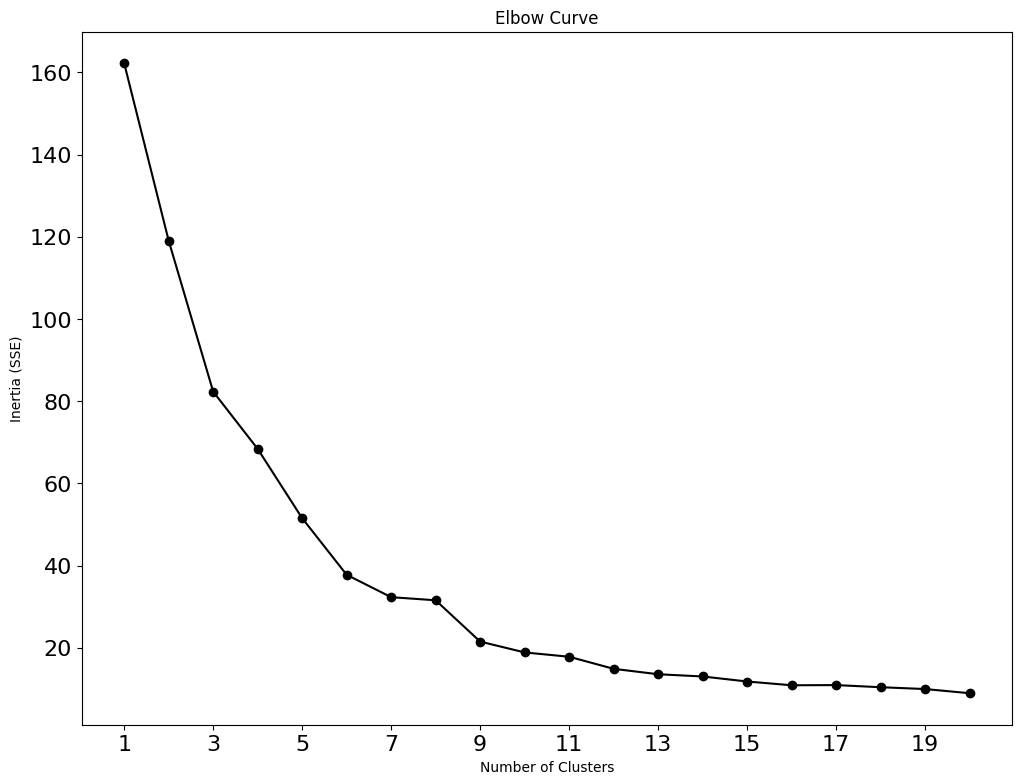

Cluster Summary:
          Graphite Powder  Graphene   Carbon Quantum Dots   \
Cluster                                                     
1                  0.000  0.303100               0.072900   
2                  0.000  0.000000               0.000000   
3                  0.000  0.000000               0.000000   
4                  0.000  0.005385               0.000000   
5                  0.000  0.823075               0.005128   
6                  0.925  0.000000               0.000000   
7                  0.000  0.000000               0.000000   
8                  0.000  0.000000               0.000000   

         Single- Walled Carbon nanotube  Multi- Walled Carbon nanotube  \
Cluster                                                                  
1                              0.000000                       0.009000   
2                              0.000000                       0.000000   
3                              0.000000                       0.000000   
4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
AA = "C:/Users/ganes/onedrive/Desktop/AI/DMFC/PCAOH.xlsx"
df = pd.read_excel(AA)
X = pd.read_excel(AA, usecols='A:AC') 

# Step 3: Determine the optimal number of clusters using the elbow method
sse = []
for E in range(1, 21):
    kmeans = KMeans(n_clusters=E)
    kmeans.fit(X)
    sse.append([E, kmeans.inertia_])

# Plot the elbow curve
plt.figure(figsize=(12, 9))
plt.xticks(range(1, 21, 2))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.tick_params(labelsize=16)
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], "k", marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Curve')
plt.show()

# Step 4: Apply K-means clustering with the chosen number of clusters (e.g., 8)
n_clusters = 8  # Set this to the number of clusters determined from the elbow curve
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Add cluster labels to the DataFrame 'df', starting from 1
df_k = pd.read_excel(AA, usecols='A:AC')  # Load full dataset
df_k['Cluster'] = kmeans.fit_predict(X) + 1  # Adding 1 to the cluster labels to start from 1

# Group by the 'Cluster' column in 'df'
cluster_summary = df_k.groupby('Cluster').mean()

print("Cluster Summary:\n", cluster_summary)


In [3]:
import pandas as pd

# Create a dictionary with the cluster summary data
data = {
    'Graphite Powder': [0.000, 0.000, 0.000, 0.000, 0.000, 0.925, 0.000, 0.000],
    'Graphene': [0.303100, 0.000000, 0.000000, 0.005385, 0.823075, 0.000000, 0.000000, 0.000000],
    'Carbon Quantum Dots': [0.072900, 0.000000, 0.000000, 0.000000, 0.005128, 0.000000, 0.000000, 0.000000],
    'Single Wall Carbon nanotube': [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.948811, 0.000000],
    'Multi Wall Carbon nanotube': [0.009000, 0.000000, 0.000000, 0.686282, 0.000000, 0.000000, 0.000000, 0.000000],
    'Carbon Nanofiber': [0.002600, 0.000000, 0.512174, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
    'Mesoporous Carbon': [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.687333],
    'Carbon Black': [0.020400, 0.733804, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
    'Nitrogen': [0.018800, 0.002391, 0.000000, 0.003590, 0.014412, 0.000000, 0.000000, 0.015333],
    'Sulphur': [0.000000, 0.000761, 0.000000, 0.019872, 0.002047, 0.000000, 0.000000, 0.001333],
    'Fe': [0.000000, 0.000000, 0.000000, 0.001154, 0.008088, 0.000000, 0.000000, 0.000000],
    'Ir': [0.000000, 0.000761, 0.000000, 0.006026, 0.000000, 0.000000, 0.000000, 0.000000],
    'Ni': [0.001600, 0.000000, 0.000000, 0.001282, 0.000000, 0.000000, 0.000000, 0.000000],
    'Pd': [0.031600, 0.000243, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
    'Pt': [0.336800, 0.168409, 0.186087, 0.187410, 0.116618, 0.050000, 0.040189, 0.204000],
    'Ru': [0.006800, 0.018859, 0.059130, 0.016026, 0.012941, 0.025000, 0.011000, 0.026000],
    'SnO2': [0.000000, 0.003913, 0.000000, 0.004615, 0.000044, 0.000000, 0.000000, 0.000000],
    'TiO2': [0.096800, 0.016087, 0.119130, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
    'Zn': [0.00000, 0.00000, 0.00000, 0.00041, 0.00000, 0.00000, 0.00000, 0.00000],
    'Heteropolyacid': [0.000000, 0.000000, 0.000000, 0.004615, 0.000000, 0.000000, 0.000000, 0.000000]
}

# Convert the dictionary to a pandas DataFrame
df_summary = pd.DataFrame(data)

# Set the 'Cluster' column as the index
df_summary.index = [1, 2, 3, 4, 5, 6, 7, 8]  # Assuming 8 clusters

# Export the DataFrame to an Excel file
df_summary.to_excel('Cluster_Summary.xlsx', sheet_name='Cluster Summary')

print("Cluster summary exported successfully to 'Cluster_Summary.xlsx'")


Cluster summary exported successfully to 'Cluster_Summary.xlsx'


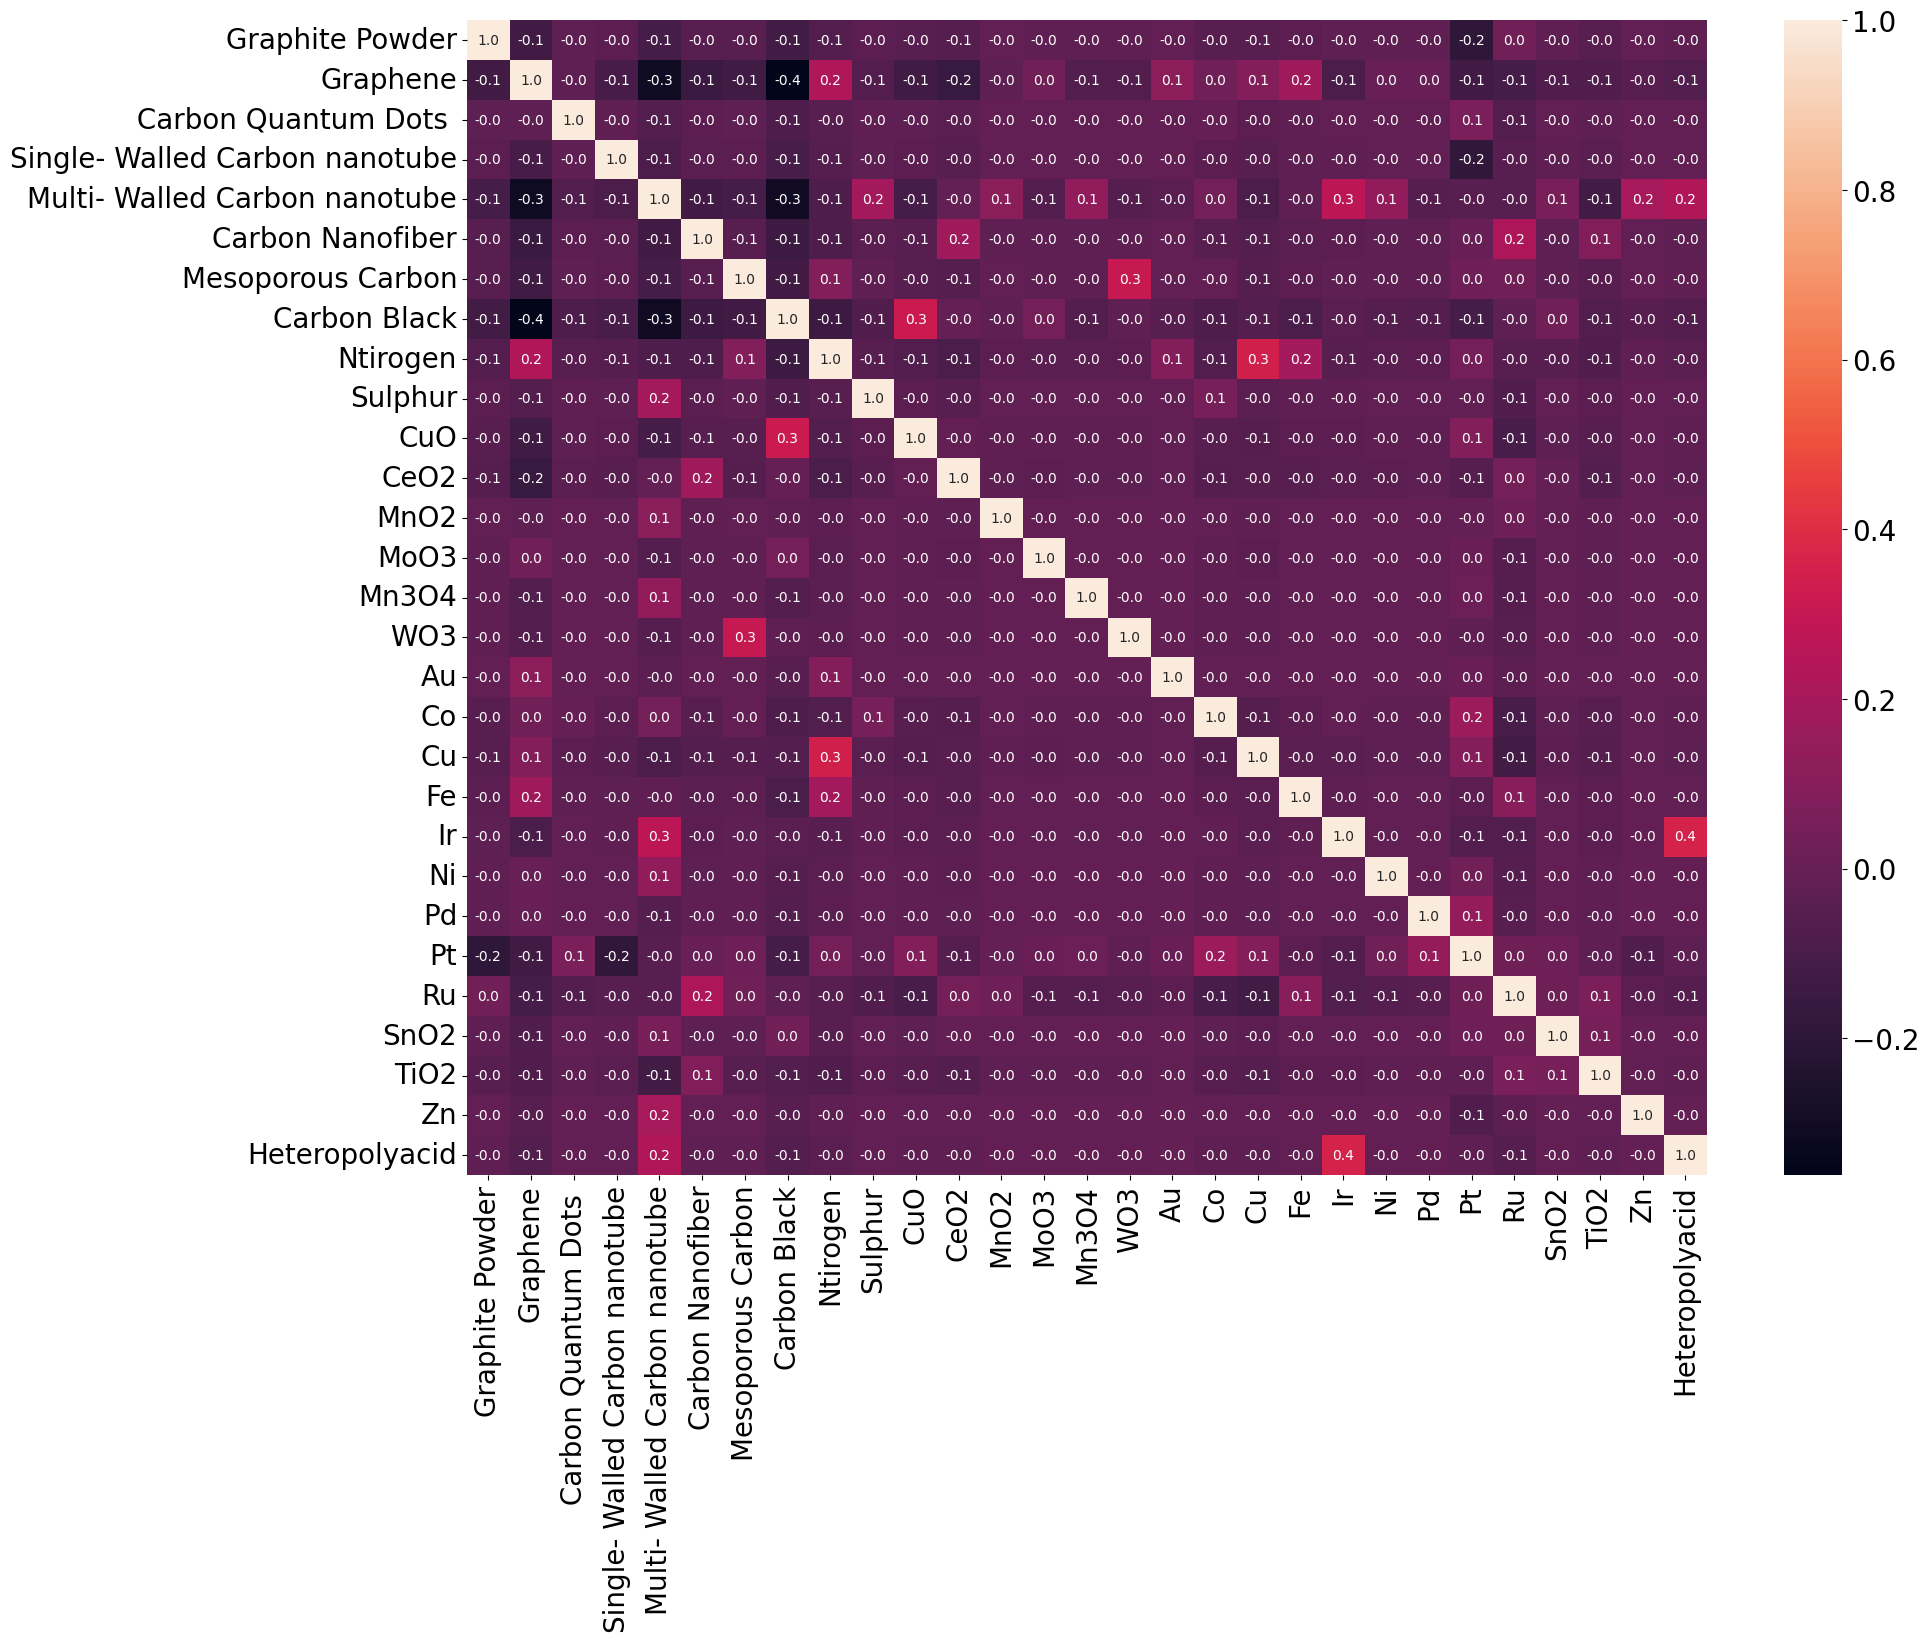

In [4]:
corr=X.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr,annot=True, annot_kws={'size': 10}, fmt=".1f")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

C:\Users\ganes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


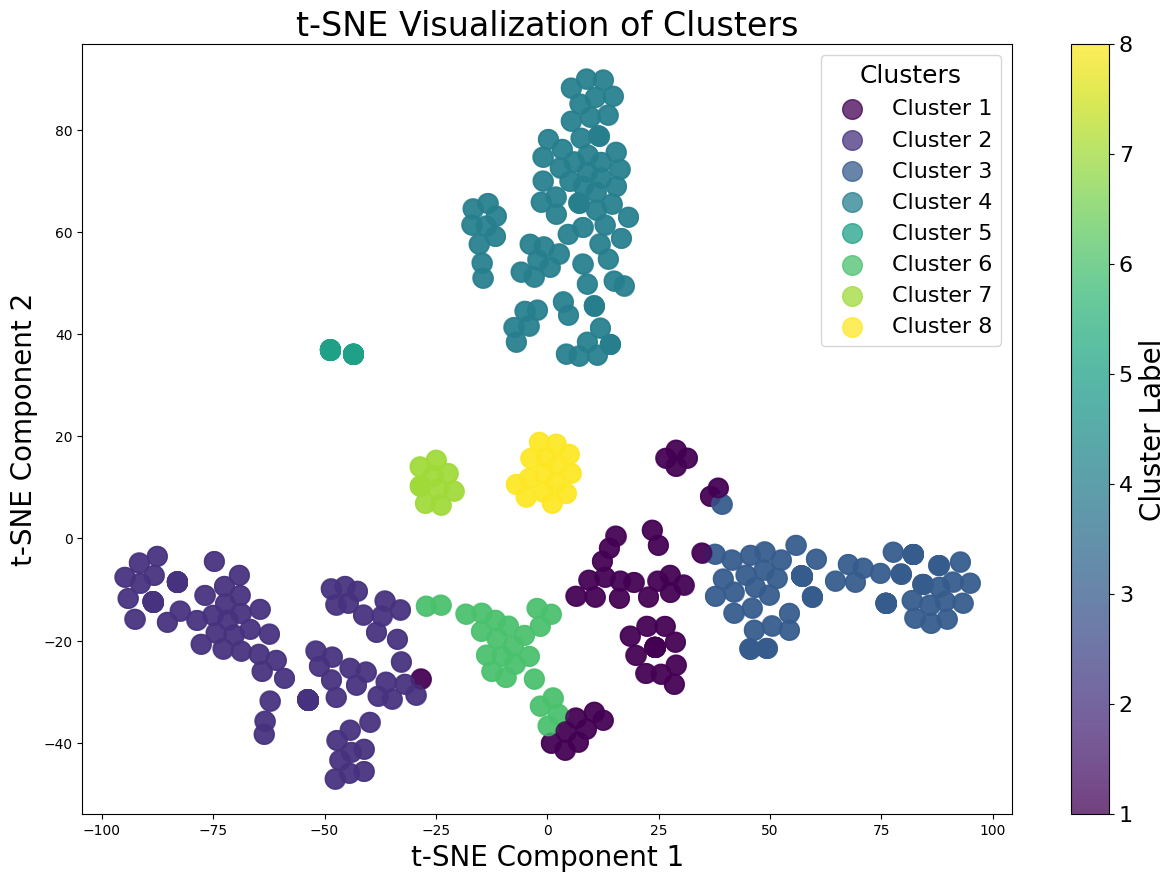

In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np

# Assuming X is your data and you want to perform KMeans clustering
cluster = KMeans(n_clusters=8, random_state=1)
cluster.fit(X)
cluster_predictions = cluster.predict(X)

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=1, n_iter=1000, perplexity=30, init="pca", learning_rate="auto")
tsne_EP = tsne.fit_transform(X)

# Set up the figure
plt.figure(figsize=(15, 10))

# Define a color map for the clusters
colors = plt.cm.viridis(np.linspace(0, 1, 8))

# Plot t-SNE result and label each cluster with a different color
for cluster_num in range(8):
    idx = cluster_predictions == cluster_num
    plt.scatter(tsne_EP[idx, 0], tsne_EP[idx, 1], color=colors[cluster_num], s=200, alpha=0.75, label=f'Cluster {cluster_num + 1}')

# Add color bar on the side
scatter = plt.scatter(tsne_EP[:, 0], tsne_EP[:, 1], c=cluster_predictions + 1, s=200, alpha=0.75, cmap='viridis')
cbar = plt.colorbar(scatter, ticks=np.arange(1, 9))  # Set ticks from 1 to 8
cbar.set_label('Cluster Label', fontsize=20)  # Label for the color bar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick size

# Improve the overall appearance of the plot
plt.title("t-SNE Visualization of Clusters", fontsize=24)
plt.xlabel("t-SNE Component 1", fontsize=20)
plt.ylabel("t-SNE Component 2", fontsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

# Add legend
plt.legend(fontsize=16, title="Clusters", title_fontsize=18)

# Show the plot
plt.show()
